In [1]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


Populating the interactive namespace from numpy and matplotlib


In [2]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Specific Plotting Params
i_leu = 0
i_delta = 2
i_heu = 4

ps = 0

Cyclus v1.2 Trading every 5 Timesteps is Repeatable as Expected

In [3]:
new_dir = 'data/v1.2/random_sink/compare_v1.3/oldEF_newRS/'

# Every 5 timesteps.  Should call Normal Dist only, not EveryRandom
old_E1 = new_dir + 'HEU03p_s05_swu180_t100_cy12_E1.csv'
old_E2 = new_dir + 'HEU03p_s05_swu180_t100_cy12_E2.csv'

raw_oE1 = pd.read_csv(old_E1) 
raw_oE2 = pd.read_csv(old_E2) 


In [4]:
LEU_oE1 = raw_oE1[raw_oE1['Prototype'] == "LEU"]
delta_LEU_oE1 = raw_oE1[raw_oE1['Prototype'] == "delta_LEU"]
covert_HEU_oE1 = raw_oE1[raw_oE1['Prototype'] == "covert_HEU"].reset_index(drop=True)

LEU_oE2 = raw_oE2[raw_oE2['Prototype'] == "LEU"]
delta_LEU_oE2 = raw_oE2[raw_oE2['Prototype'] == "delta_LEU"]
covert_HEU_oE2 = raw_oE2[raw_oE2['Prototype'] == "covert_HEU"]


In [5]:
LEU_tp_oE1 =(LEU_oE1[' Quantity']- LEU_oE1[' Quantity'].shift(1))
delta_LEU_tp_oE1 =  delta_LEU_oE1[' Quantity']- delta_LEU_oE1[' Quantity'].shift(1)
covert_HEU_tp_oE1 =  covert_HEU_oE1[' Quantity']- covert_HEU_oE1[' Quantity'].shift(1) 

LEU_tp_oE2 =(LEU_oE2[' Quantity']- LEU_oE2[' Quantity'].shift(1))
delta_LEU_tp_oE2 =  delta_LEU_oE2[' Quantity']- delta_LEU_oE2[' Quantity'].shift(1)
covert_HEU_tp_oE2 =  covert_HEU_oE2[' Quantity']- covert_HEU_oE2[' Quantity'].shift(1) 

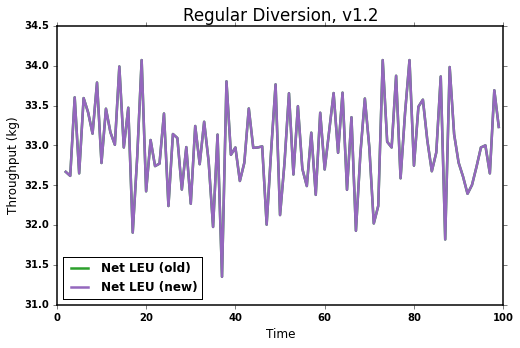

In [6]:
plt.plot(LEU_oE1['Time'],(LEU_tp_oE1), label='Net LEU (old)', color=tableau20[i_leu+4])
plt.plot(LEU_oE2['Time'],(LEU_tp_oE2), label='Net LEU (new)', color=tableau20[i_leu+6])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.2")


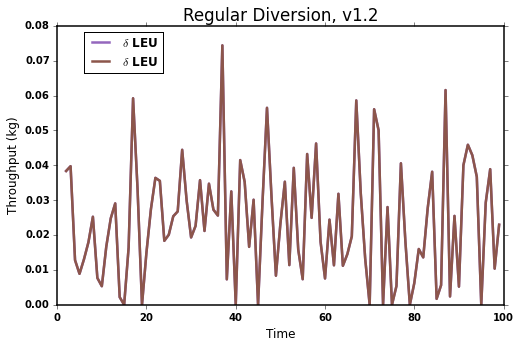

In [7]:
plt.plot(delta_LEU_oE1['Time'],delta_LEU_tp_oE1, label='$\delta$ LEU', color=tableau20[i_delta+4])
plt.plot(delta_LEU_oE2['Time'],delta_LEU_tp_oE2, label='$\delta$ LEU', color=tableau20[i_delta+6])
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.2")


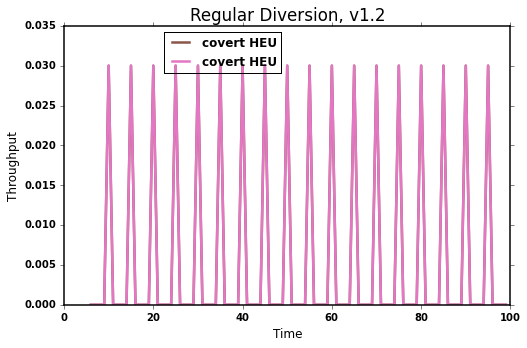

In [8]:
plt.plot(LEU_oE1['Time'][4:],covert_HEU_tp_oE1, label='covert HEU', color=tableau20[i_heu+4])
plt.plot(LEU_oE2['Time'][4:],covert_HEU_tp_oE2, label='covert HEU', color=tableau20[i_heu+6])

plt.legend(bbox_to_anchor=(0.5, 1))
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title("Regular Diversion, v1.2")


Cyclus v1.2 Using Normal Distribution only (No random HEU diversion) is repeatable (expected)

In [9]:
new_dir = 'data/v1.2/random_sink/compare_v1.3/oldEF_newRS/'

no_R1 = new_dir + 'HEU0p_s05_swu180_t100_cy12_1.csv'
no_R2 = new_dir + 'HEU0p_s05_swu180_t100_cy12_2.csv'
no_R3 = new_dir + 'HEU0p_s05_swu180_t100_cy12_3.csv'

raw_1R = pd.read_csv(no_R1) 
raw_2R = pd.read_csv(no_R2) 
raw_3R = pd.read_csv(no_R3) 


In [10]:
LEU_1R = raw_1R[raw_1R['Prototype'] == "LEU"]
delta_LEU_1R = raw_1R[raw_1R['Prototype'] == "delta_LEU"]

LEU_2R = raw_2R[raw_2R['Prototype'] == "LEU"]
delta_LEU_2R = raw_2R[raw_2R['Prototype'] == "delta_LEU"]

LEU_3R = raw_3R[raw_3R['Prototype'] == "LEU"]
delta_LEU_3R = raw_3R[raw_3R['Prototype'] == "delta_LEU"]


In [11]:
LEU_tp_1R =(LEU_1R[' Quantity']- LEU_1R[' Quantity'].shift(1))
delta_LEU_tp_1R =  delta_LEU_1R[' Quantity']- delta_LEU_1R[' Quantity'].shift(1)

LEU_tp_2R =(LEU_2R[' Quantity']- LEU_2R[' Quantity'].shift(1))
delta_LEU_tp_2R =  delta_LEU_2R[' Quantity']- delta_LEU_2R[' Quantity'].shift(1)

LEU_tp_3R =(LEU_3R[' Quantity']- LEU_3R[' Quantity'].shift(1))
delta_LEU_tp_3R =  delta_LEU_3R[' Quantity']- delta_LEU_3R[' Quantity'].shift(1)


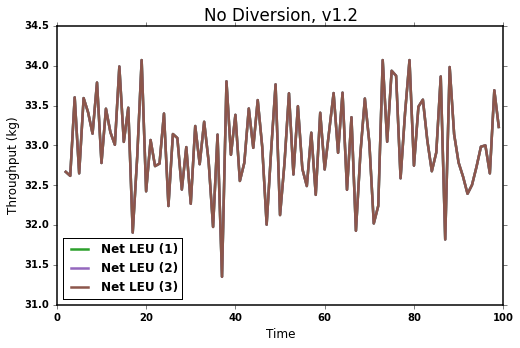

In [12]:
plt.plot(LEU_1R['Time'],(LEU_tp_1R), label='Net LEU (1)', color=tableau20[i_leu+4])
plt.plot(LEU_2R['Time'],(LEU_tp_2R), label='Net LEU (2)', color=tableau20[i_leu+6])
plt.plot(LEU_3R['Time'],(LEU_tp_3R), label='Net LEU (3)', color=tableau20[i_leu+8])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("No Diversion, v1.2")


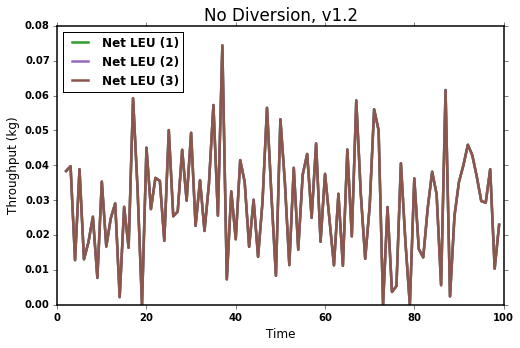

In [13]:
plt.plot(delta_LEU_1R['Time'],(delta_LEU_tp_1R), label='Net LEU (1)', color=tableau20[i_leu+4])
plt.plot(delta_LEU_2R['Time'],(delta_LEU_tp_2R), label='Net LEU (2)', color=tableau20[i_leu+6])
plt.plot(delta_LEU_3R['Time'],(delta_LEU_tp_3R), label='Net LEU (3)', color=tableau20[i_leu+8])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("No Diversion, v1.2")



    Cyclus v1.2 (as of Mar 12) - Random Is NOT Repeatable (4 in 20 cases)

In [14]:
new_dir = 'data/v1.2/random_sink/compare_v1.3/oldEF_newRS/'

#Recalculated original data (cyclus v1.2, RandomSink) as of 9-Jul-2015
#Used cyclus commit 8637caf23db62c425e2d3f4060453b39edc61f04

# Available files are R1-R6
old_R1 = new_dir + 'HEU03p_s05_swu180_t100_cy12_R1.csv'
old_R2 = new_dir + 'HEU03p_s05_swu180_t100_cy12_R2.csv'
old_R3 = new_dir + 'HEU03p_s05_swu180_t100_cy12_R14.csv'

# Compare two random cases for cyclus v1.2
raw_oR1 = pd.read_csv(old_R1) 
raw_oR2 = pd.read_csv(old_R2) 
raw_oR3 = pd.read_csv(old_R3) 



In [15]:
LEU_oR1 = raw_oR1[raw_oR1['Prototype'] == "LEU"]
delta_LEU_oR1 = raw_oR1[raw_oR1['Prototype'] == "delta_LEU"]
covert_HEU_oR1 = raw_oR1[raw_oR1['Prototype'] == "covert_HEU"]

LEU_oR2 = raw_oR2[raw_oR2['Prototype'] == "LEU"]
delta_LEU_oR2 = raw_oR2[raw_oR2['Prototype'] == "delta_LEU"]
covert_HEU_oR2 = raw_oR2[raw_oR2['Prototype'] == "covert_HEU"]

LEU_oR3 = raw_oR3[raw_oR3['Prototype'] == "LEU"]
delta_LEU_oR3 = raw_oR3[raw_oR3['Prototype'] == "delta_LEU"]
covert_HEU_oR3 = raw_oR3[raw_oR3['Prototype'] == "covert_HEU"]

In [16]:
LEU_tp_oR1 =(LEU_oR1[' Quantity']- LEU_oR1[' Quantity'].shift(1))
delta_LEU_tp_oR1 =  delta_LEU_oR1[' Quantity']- delta_LEU_oR1[' Quantity'].shift(1)
covert_HEU_tp_oR1 =  covert_HEU_oR1[' Quantity']- covert_HEU_oR1[' Quantity'].shift(1) 

LEU_tp_oR2 =(LEU_oR2[' Quantity']- LEU_oR2[' Quantity'].shift(1))
delta_LEU_tp_oR2 =  delta_LEU_oR2[' Quantity']- delta_LEU_oR2[' Quantity'].shift(1)
covert_HEU_tp_oR2 =  covert_HEU_oR2[' Quantity']- covert_HEU_oR2[' Quantity'].shift(1) 

LEU_tp_oR3 =(LEU_oR3[' Quantity']- LEU_oR3[' Quantity'].shift(1))
delta_LEU_tp_oR3 =  delta_LEU_oR3[' Quantity']- delta_LEU_oR3[' Quantity'].shift(1)
covert_HEU_tp_oR3 =  covert_HEU_oR3[' Quantity']- covert_HEU_oR3[' Quantity'].shift(1) 

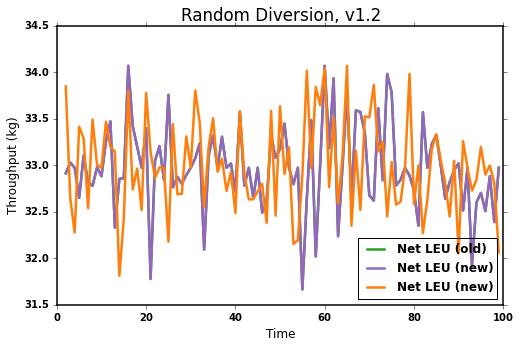

In [17]:
plt.plot(LEU_oR1['Time'],(LEU_tp_oR1), label='Net LEU (old)', color=tableau20[i_leu+4])
plt.plot(LEU_oR2['Time'],(LEU_tp_oR2), label='Net LEU (new)', color=tableau20[i_leu+6])
plt.plot(LEU_oR3['Time'],(LEU_tp_oR3), label='Net LEU (new)', color=tableau20[i_leu+2])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion, v1.2")


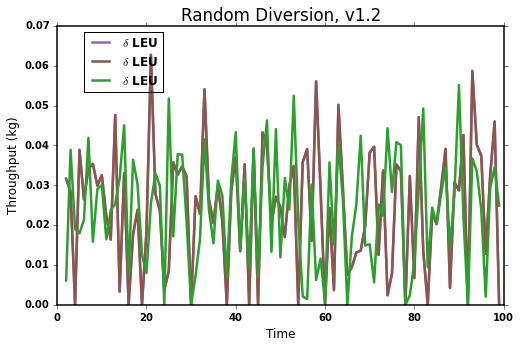

In [18]:
plt.plot(delta_LEU_oR1['Time'],delta_LEU_tp_oR1, label='$\delta$ LEU', color=tableau20[i_delta+4])
plt.plot(delta_LEU_oR2['Time'],delta_LEU_tp_oR2, label='$\delta$ LEU', color=tableau20[i_delta+6])
plt.plot(delta_LEU_oR3['Time'],delta_LEU_tp_oR3, label='$\delta$ LEU', color=tableau20[i_delta+2])
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion, v1.2")



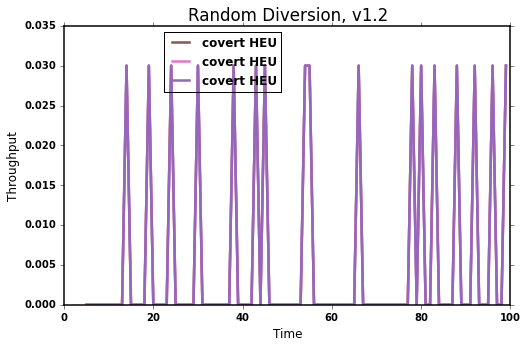

In [19]:
## Actual old random set (Yarden fixed Cyclist to not drop the first datapoint from the CSV)
plt.plot(LEU_oR1['Time'][3:],covert_HEU_tp_oR1, label='covert HEU', color=tableau20[i_heu+4])
plt.plot(LEU_oR2['Time'][3:],covert_HEU_tp_oR2, label='covert HEU', color=tableau20[i_heu+6])
plt.plot(LEU_oR3['Time'][3:],covert_HEU_tp_oR3, label='covert HEU', color=tableau20[i_heu+2])

plt.legend(bbox_to_anchor=(0.5, 1))
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title("Random Diversion, v1.2")


    Cyclus v1.3 (as of 9-July) - Normal Dist. is Repeatable

In [20]:
new_dir = 'data/v1.2/random_sink/compare_v1.3/oldEF_newRS/'

new_E1 = new_dir + 'HEU03p_s05_swu180_t100_cy13_E1.csv'
new_E2 = new_dir + 'HEU03p_s05_swu180_t100_cy13_E2.csv'

raw_nE1 = pd.read_csv(new_E1) 
raw_nE2 = pd.read_csv(new_E2) 


In [21]:
LEU_nE1 = raw_nE1[raw_nE1['Prototype'] == "LEU"]
delta_LEU_nE1 = raw_nE1[raw_nE1['Prototype'] == "delta_LEU"]
covert_HEU_nE1 = raw_nE1[raw_nE1['Prototype'] == "covert_HEU"]

LEU_nE2 = raw_nE2[raw_nE2['Prototype'] == "LEU"]
delta_LEU_nE2 = raw_nE2[raw_nE2['Prototype'] == "delta_LEU"]
covert_HEU_nE2 = raw_nE2[raw_nE2['Prototype'] == "covert_HEU"]


In [22]:
LEU_tp_nE1 =(LEU_nE1[' Quantity']- LEU_nE1[' Quantity'].shift(1))
delta_LEU_tp_nE1 =  delta_LEU_nE1[' Quantity']- delta_LEU_nE1[' Quantity'].shift(1)
covert_HEU_tp_nE1 =  covert_HEU_nE1[' Quantity']- covert_HEU_nE1[' Quantity'].shift(1)

LEU_tp_nE2 =(LEU_nE2[' Quantity']- LEU_nE2[' Quantity'].shift(1))
delta_LEU_tp_nE2 =  delta_LEU_nE2[' Quantity']- delta_LEU_nE2[' Quantity'].shift(1)
covert_HEU_tp_nE2 =  covert_HEU_nE2[' Quantity']- covert_HEU_nE2[' Quantity'].shift(1)


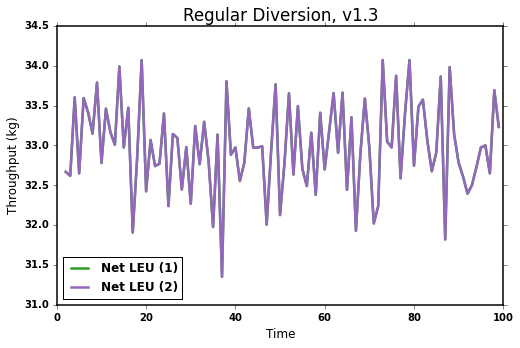

In [23]:
plt.plot(LEU_nE1['Time'],(LEU_tp_nE1), label='Net LEU (1)', color=tableau20[i_leu+4])
plt.plot(LEU_nE2['Time'],(LEU_tp_nE2), label='Net LEU (2)', color=tableau20[i_leu+6])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.3")


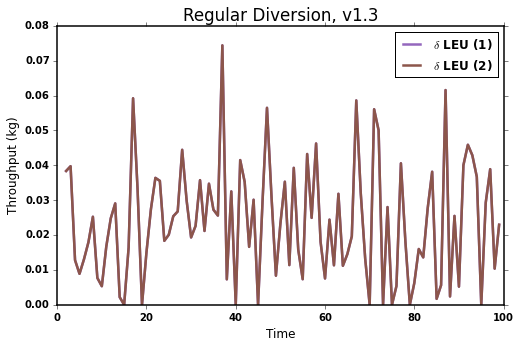

In [24]:
plt.plot(delta_LEU_nE1['Time'],(delta_LEU_tp_nE1), label='$\delta$ LEU (1)', color=tableau20[i_delta+4])
plt.plot(delta_LEU_nE2['Time'],(delta_LEU_tp_nE2), label='$\delta$ LEU (2)', color=tableau20[i_delta+6])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.3")


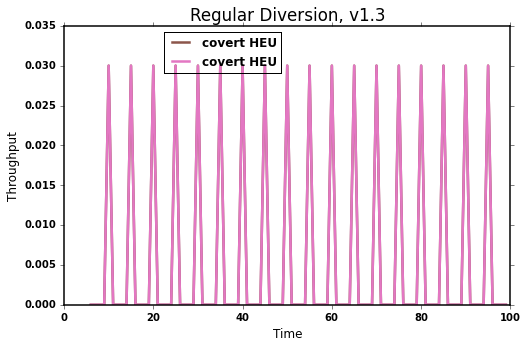

In [25]:
plt.plot(LEU_nE1['Time'][4:],covert_HEU_tp_nE1, label='covert HEU', color=tableau20[i_heu+4])
plt.plot(LEU_nE2['Time'][4:],covert_HEU_tp_nE2, label='covert HEU', color=tableau20[i_heu+6])

plt.legend(bbox_to_anchor=(0.5, 1))
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title("Regular Diversion, v1.3")


    Cyclus v1.3 (as of Jul 9) - Random Is NOT Repeatable (1 in 20 cases)

In [26]:
new_dir = 'data/v1.2/random_sink/compare_v1.3/oldEF_newRS/'

#New data (cyclus v1.3, RandomSink) as of 9-Jul-2015

new_R1 = new_dir + 'HEU03p_s05_swu180_t100_cy13_R1.csv'
new_R2 = new_dir + 'HEU03p_s05_swu180_t100_cy13_R2.csv'

# Compare two random cases for cyclus v1.3
raw_nR1 = pd.read_csv(new_R1) 
raw_nR2 = pd.read_csv(new_R2) 



In [27]:
LEU_nR1 = raw_nR1[raw_nR1['Prototype'] == "LEU"]
delta_LEU_nR1 = raw_nR1[raw_nR1['Prototype'] == "delta_LEU"]
covert_HEU_nR1 = raw_nR1[raw_nR1['Prototype'] == "covert_HEU"]

LEU_nR2 = raw_nR2[raw_nR2['Prototype'] == "LEU"]
delta_LEU_nR2 = raw_nR2[raw_nR2['Prototype'] == "delta_LEU"]
covert_HEU_nR2 = raw_nR2[raw_nR2['Prototype'] == "covert_HEU"]

In [28]:
LEU_tp_nR1 =(LEU_nR1[' Quantity']- LEU_nR1[' Quantity'].shift(1))
delta_LEU_tp_nR1 =  delta_LEU_nR1[' Quantity']- delta_LEU_nR1[' Quantity'].shift(1)
covert_HEU_tp_nR1 =  covert_HEU_nR1[' Quantity']- covert_HEU_nR1[' Quantity'].shift(1) 

LEU_tp_nR2 =(LEU_nR2[' Quantity']- LEU_nR2[' Quantity'].shift(1))
delta_LEU_tp_nR2 =  delta_LEU_nR2[' Quantity']- delta_LEU_nR2[' Quantity'].shift(1)
covert_HEU_tp_nR2 =  covert_HEU_nR2[' Quantity']- covert_HEU_nR2[' Quantity'].shift(1) 

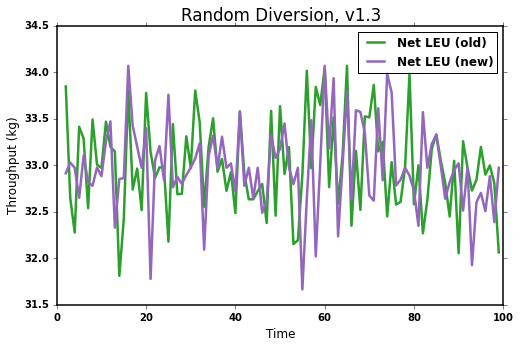

In [29]:
plt.plot(LEU_nR1['Time'],(LEU_tp_nR1), label='Net LEU (old)', color=tableau20[i_leu+4])
plt.plot(LEU_nR2['Time'],(LEU_tp_nR2), label='Net LEU (new)', color=tableau20[i_leu+6])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion, v1.3")


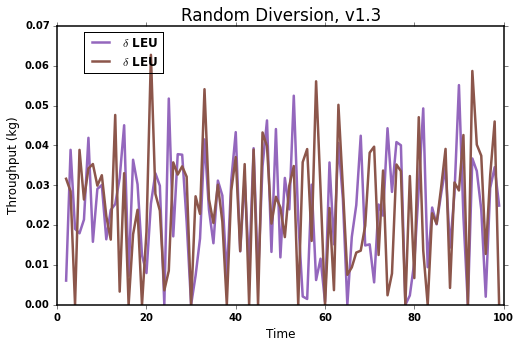

In [30]:
plt.plot(delta_LEU_nR1['Time'],delta_LEU_tp_nR1, label='$\delta$ LEU', color=tableau20[i_delta+4])
plt.plot(delta_LEU_nR2['Time'],delta_LEU_tp_nR2, label='$\delta$ LEU', color=tableau20[i_delta+6])
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Random Diversion, v1.3")



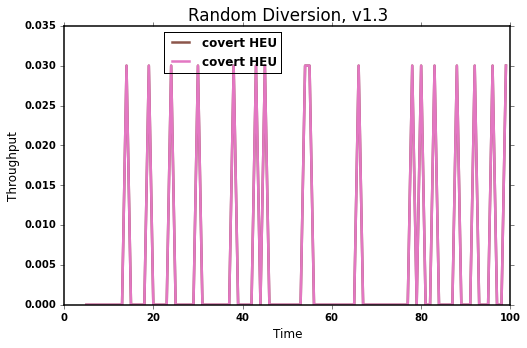

In [31]:
## Actual old random set (Yarden fixed Cyclist to not drop the first datapoint from the CSV)
plt.plot(LEU_nR1['Time'][3:],covert_HEU_tp_nR1, label='covert HEU', color=tableau20[i_heu+4])
plt.plot(LEU_nR2['Time'][3:],covert_HEU_tp_nR2, label='covert HEU', color=tableau20[i_heu+6])

plt.legend(bbox_to_anchor=(0.5, 1))
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title("Random Diversion, v1.3")
